### Importing libraries

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [127]:
data=pd.read_csv("customer_support_tickets.csv")

In [128]:
data.head(3)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0


In [129]:
data.shape

(8469, 17)

In [130]:
data.info

<bound method DataFrame.info of       Ticket ID        Customer Name              Customer Email  \
0             1        Marisa Obrien  carrollallison@example.com   
1             2         Jessica Rios    clarkeashley@example.com   
2             3  Christopher Robbins   gonzalestracy@example.com   
3             4     Christina Dillon    bradleyolson@example.org   
4             5    Alexander Carroll     bradleymark@example.com   
...         ...                  ...                         ...   
8464       8465           David Todd          adam28@example.net   
8465       8466           Lori Davis       russell68@example.com   
8466       8467      Michelle Kelley        ashley83@example.org   
8467       8468     Steven Rodriguez         fpowell@example.org   
8468       8469      Steven Davis MD          lori20@example.net   

      Customer Age Customer Gender       Product Purchased Date of Purchase  \
0               32           Other              GoPro Hero       2021-03

In [131]:
data.columns


Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [132]:
data.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [133]:
data=data.dropna()

In [134]:
data.isnull().sum()

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

In [135]:
import warnings
warnings.filterwarnings("ignore")


In [136]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [137]:
data.head(4)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2,3,519,844,48,2,10,191,4,8,53,0,343,2,3,1347,2153,3.0
3,4,475,252,27,0,25,310,0,0,627,0,2549,2,3,946,293,3.0
4,5,34,251,67,0,5,34,0,3,188,0,2657,2,1,96,2356,1.0
10,11,1297,1619,48,1,30,376,1,3,1323,0,1368,1,2,2079,85,1.0


In [138]:
X =data.drop(['Ticket ID', 'Customer Satisfaction Rating'], axis=1)
y = data['Customer Satisfaction Rating']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [140]:
 # Feature Scaling
 scaler = StandardScaler()
 X_train = scaler.fit_transform(X_train)
 X_test = scaler.transform(X_test)

### Model Building

In [61]:
# Train a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
# Predict on the test set
y_pred = rfc.predict(X_test)
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.20577617328519857
Classification Report:
               precision    recall  f1-score   support

         1.0       0.17      0.17      0.17       168
         2.0       0.24      0.22      0.23       174
         3.0       0.24      0.26      0.25       175
         4.0       0.19      0.17      0.18       162
         5.0       0.18      0.20      0.19       152

    accuracy                           0.21       831
   macro avg       0.21      0.20      0.20       831
weighted avg       0.21      0.21      0.21       831

Confusion Matrix:
 [[29 41 38 27 33]
 [42 38 34 27 33]
 [37 23 45 34 36]
 [31 27 36 28 40]
 [27 29 36 29 31]]


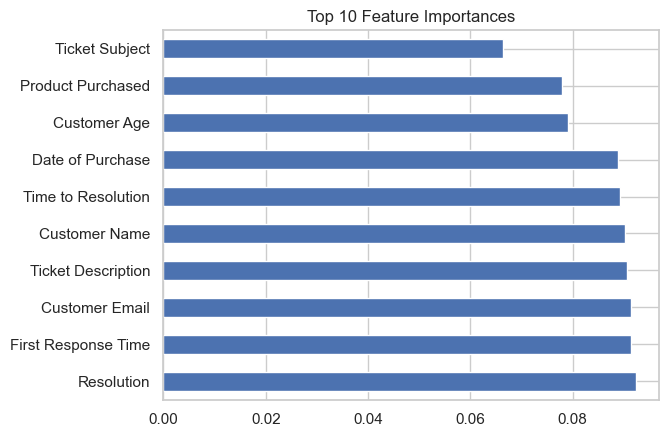

In [141]:
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [144]:
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

In [145]:
dataset = pd.read_csv("customer_support_tickets.csv")

In [146]:
dataset.head(3)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0


## Most common issues for customers

In [147]:
common_issues = dataset['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)

Top 10 Common Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


### Visualization over customer's issue's

In [148]:
## tickets trends

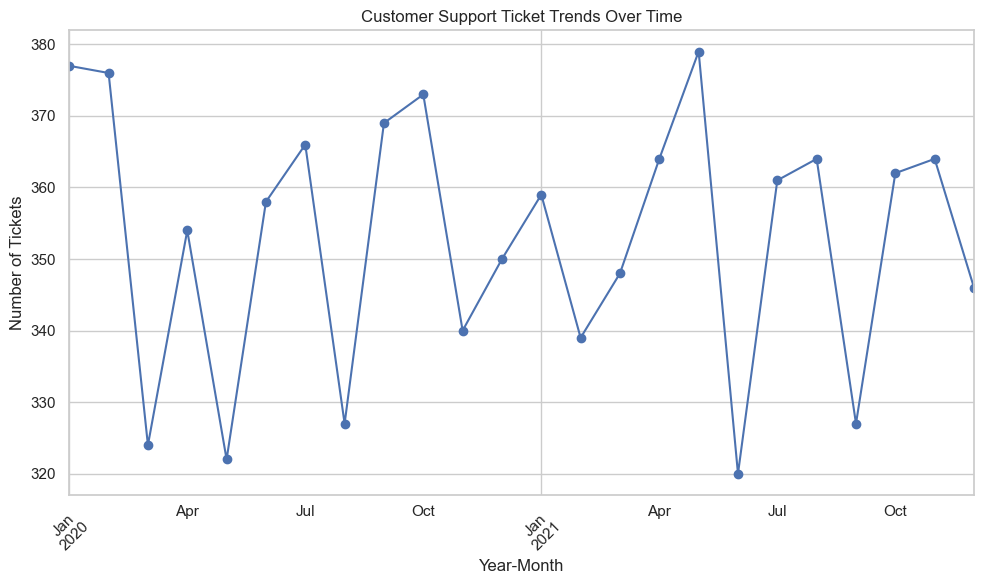

In [149]:
dataset['Date of Purchase'] = pd.to_datetime(dataset['Date of Purchase'])
dataset['YearMonth'] = dataset['Date of Purchase'].dt.to_period('M')
ticket_trends = dataset.groupby('YearMonth').size()
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
### Segment based on ticket type

In [76]:
ticket_type_segmentation = dataset.groupby('Ticket Type').size()
print("\nSegmentation based on Ticket Types:")
print(ticket_type_segmentation)
satisfaction_segmentation = dataset.groupby('Customer Satisfaction Rating').size()
print("\nSegmentation based on Customer Satisfaction Levels:")
print(satisfaction_segmentation)


Segmentation based on Ticket Types:
Ticket Type
Billing inquiry         1634
Cancellation request    1695
Product inquiry         1641
Refund request          1752
Technical issue         1747
dtype: int64

Segmentation based on Customer Satisfaction Levels:
Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
dtype: int64


In [78]:
### Set up the plotting aesthetics

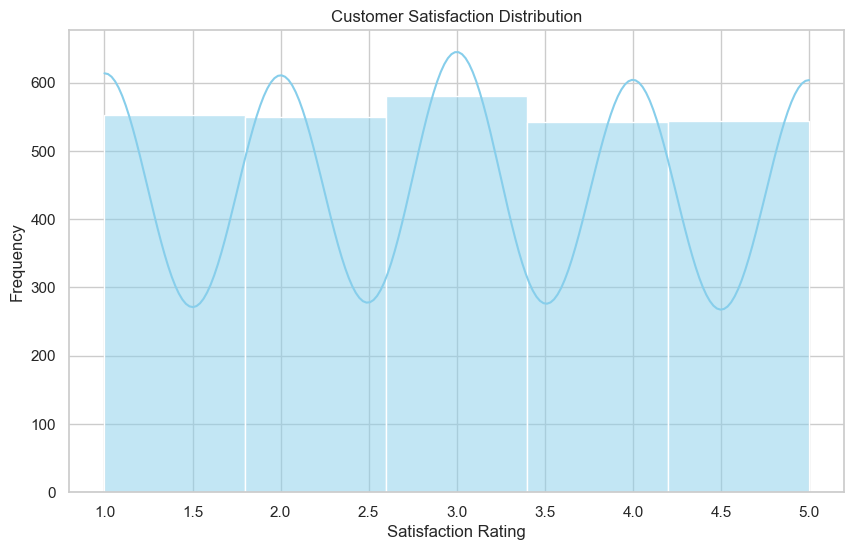

In [77]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Satisfaction Rating'], bins=5,
kde=True, color='skyblue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

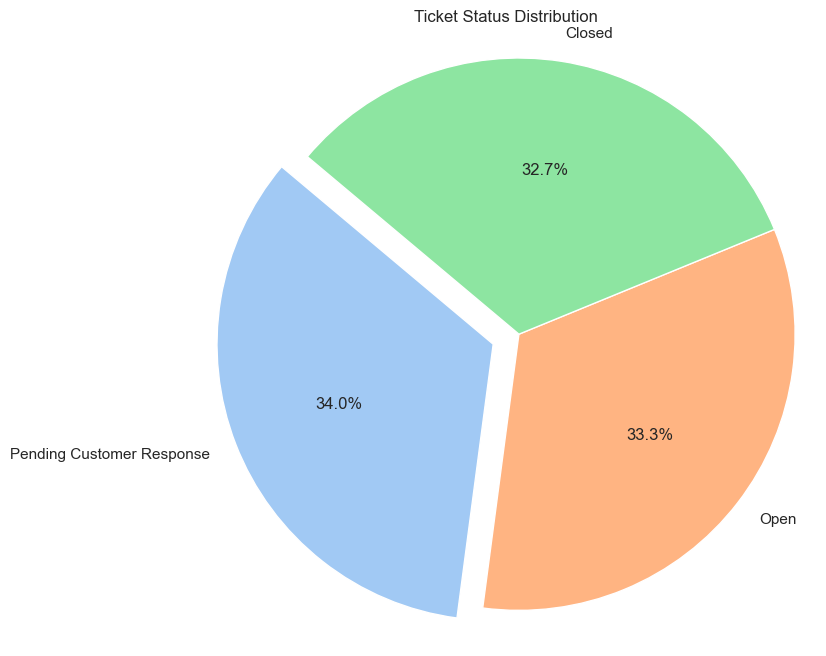

In [88]:
ticket_status_distribution = dataset['Ticket Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ticket_status_distribution,
labels=ticket_status_distribution.index, autopct='%1.1f%%',explode=[0.1,0,0],colors=sns.color_palette('pastel'), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

In [90]:
###Customer Age Distribution

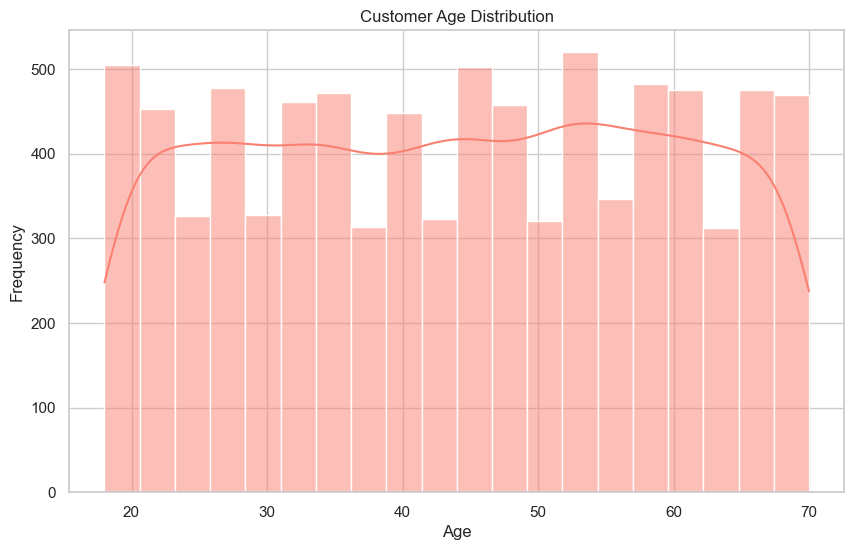

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Customer Age'], bins=20, kde=True,
color='salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [150]:
### CustomergenderDistribution

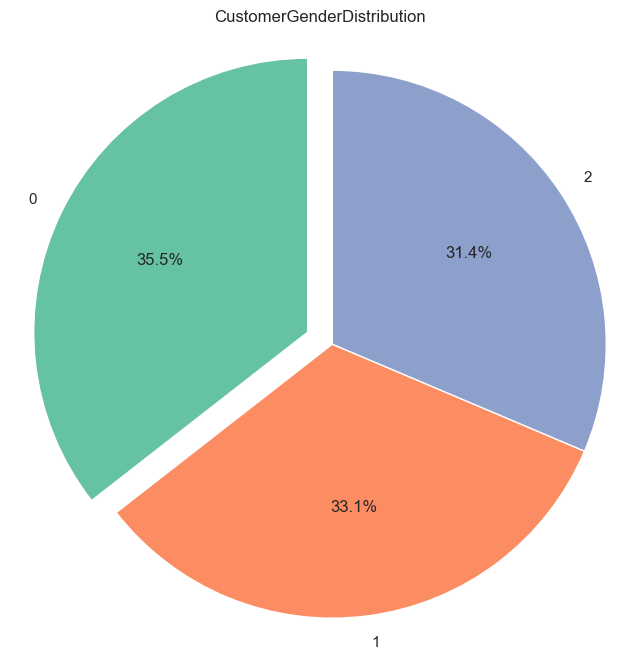

In [92]:
customer_gender_distribution=data['Customer Gender'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(customer_gender_distribution,
labels=customer_gender_distribution.index,autopct='%1.1f%%',explode=[0.1,0,0],colors=sns.color_palette('Set2'),startangle=90)
plt.title('CustomerGenderDistribution')
plt.axis('equal')
plt.show()

In [94]:
###Ticket Channel Distribution

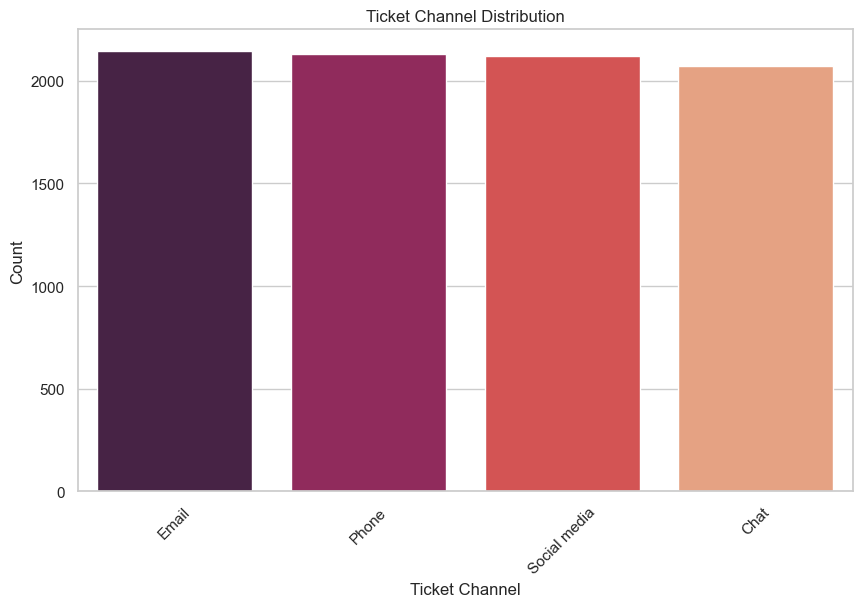

In [101]:
plt.figure(figsize=(10, 6))
ticket_channel_distribution = dataset['Ticket Channel'].value_counts()
sns.barplot(x=ticket_channel_distribution.index,y=ticket_channel_distribution, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [102]:
### Average Customer Satisfaction by Gender (Bar Plot)

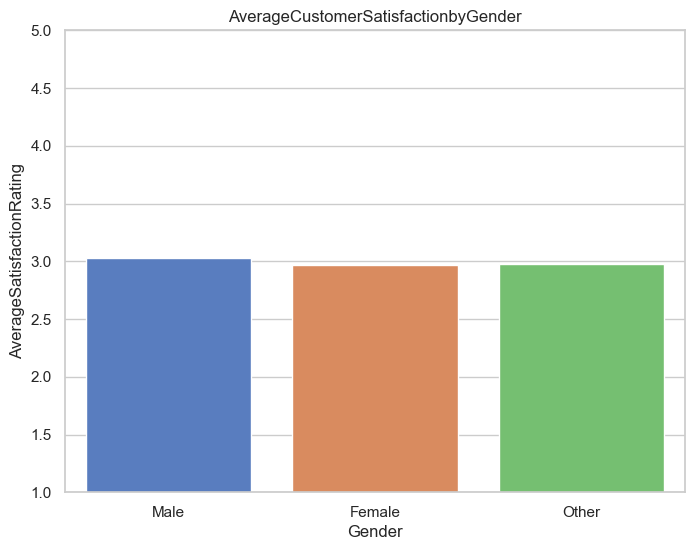

In [100]:
average_satisfaction=dataset.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Customer Gender',y='Customer Satisfaction Rating',data=average_satisfaction,palette='muted',order=['Male','Female','Other'])
plt.title('AverageCustomerSatisfactionbyGender')
plt.xlabel('Gender')
plt.ylabel('AverageSatisfactionRating')
plt.ylim(1,5) # Adjust y-axis limit if needed
plt.show()

In [103]:
### Product Purchased Distribution

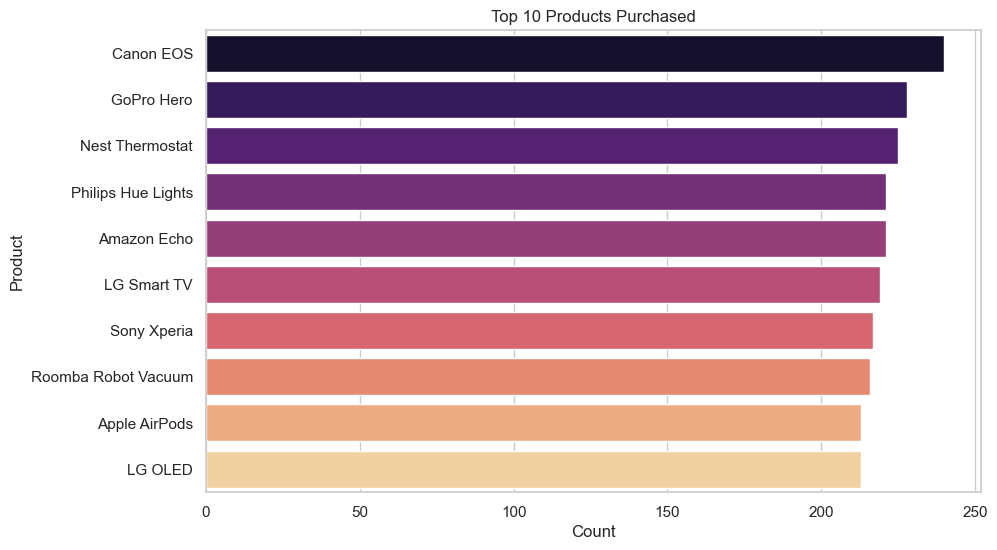

In [106]:
plt.figure(figsize=(10, 6))
product_purchased_distribution = dataset['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index,x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

In [107]:
### Top Items Purchased by Gender (Horizontal Bar Chart)

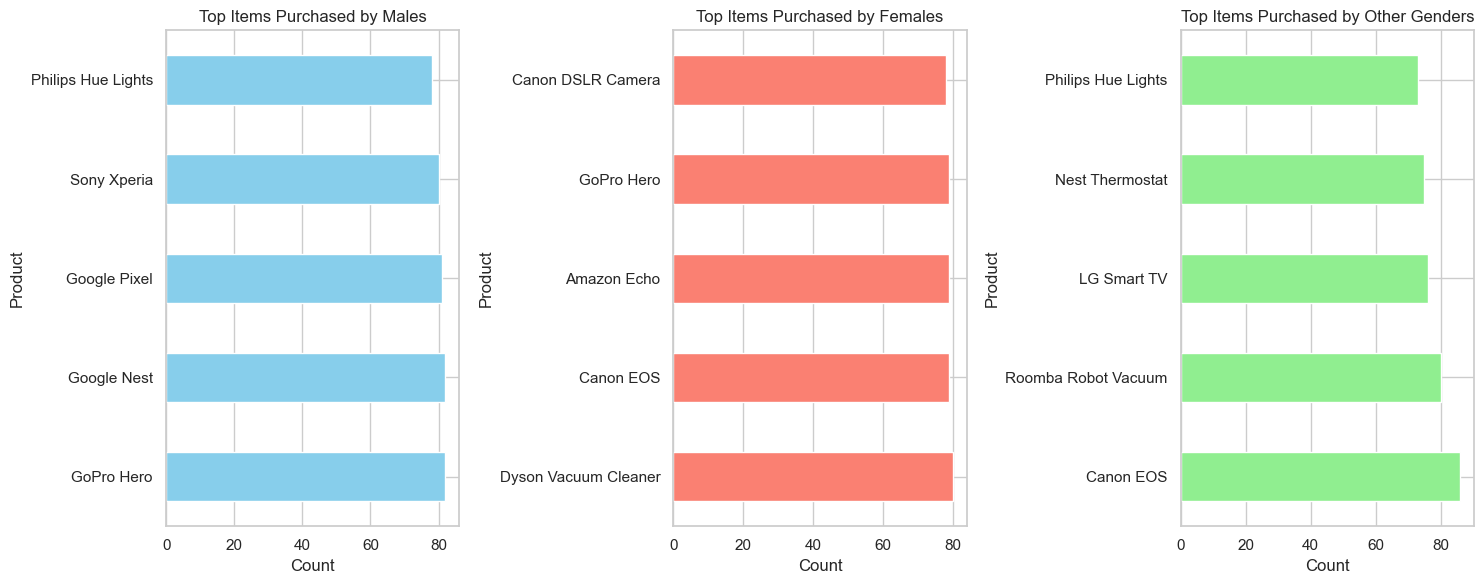

In [111]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
top_items_male = dataset[dataset['Customer Gender'] =='Male']['Product Purchased'].value_counts().head(5)
top_items_male.plot(kind='barh', color='skyblue')
plt.title('Top Items Purchased by Males')
plt.xlabel('Count')
plt.ylabel('Product')
plt.subplot(1, 3, 2)
top_items_female = dataset[dataset['Customer Gender'] =='Female']['Product Purchased'].value_counts().head(5)
top_items_female.plot(kind='barh', color='salmon')
plt.title('Top Items Purchased by Females')
plt.xlabel('Count')
plt.ylabel('Product')
plt.subplot(1, 3, 3)
top_items_other = dataset[dataset['Customer Gender'] =='Other']['Product Purchased'].value_counts().head(5)
top_items_other.plot(kind='barh', color='lightgreen')
plt.title('Top Items Purchased by Other Genders')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

In [112]:
 ### Count ticket types

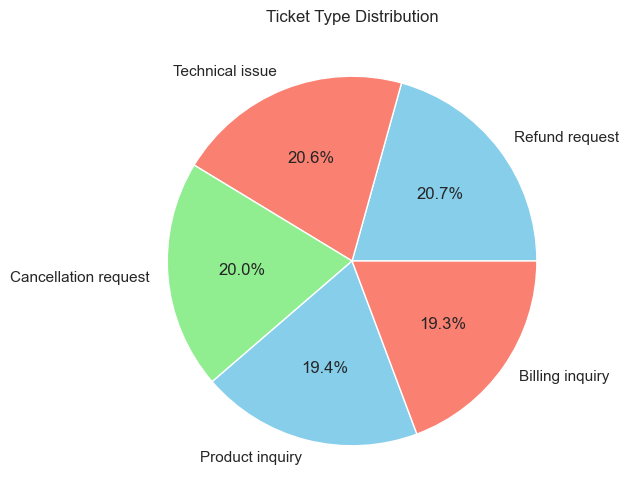

In [114]:
ticket_type_distribution = dataset['Ticket Type'].value_counts()
plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%',colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()

In [115]:
 # Count ticket priorities

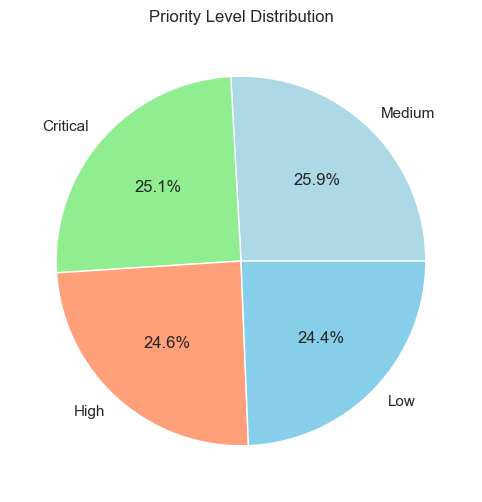

In [117]:
priority_distribution = dataset['Ticket Priority'].value_counts()
plt.figure(figsize=(8, 6))
priority_distribution.plot(kind='pie', autopct='%1.1f%%',colors=['lightblue', 'lightgreen', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')
plt.show()

In [151]:
### Ticket rised by age group

In [152]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70','71-80', '81-90', '91-100']

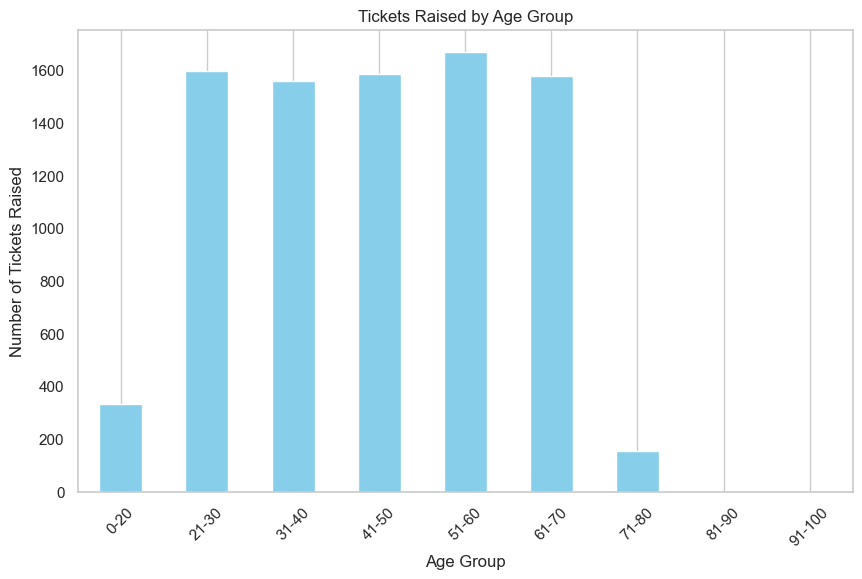

In [120]:
dataset['Age Group'] = pd.cut(dataset['Customer Age'], bins=bins,
labels=labels, right=False)
tickets_by_age_group = dataset.groupby('Age Group').size()
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [153]:
### Replace inf values with NaN

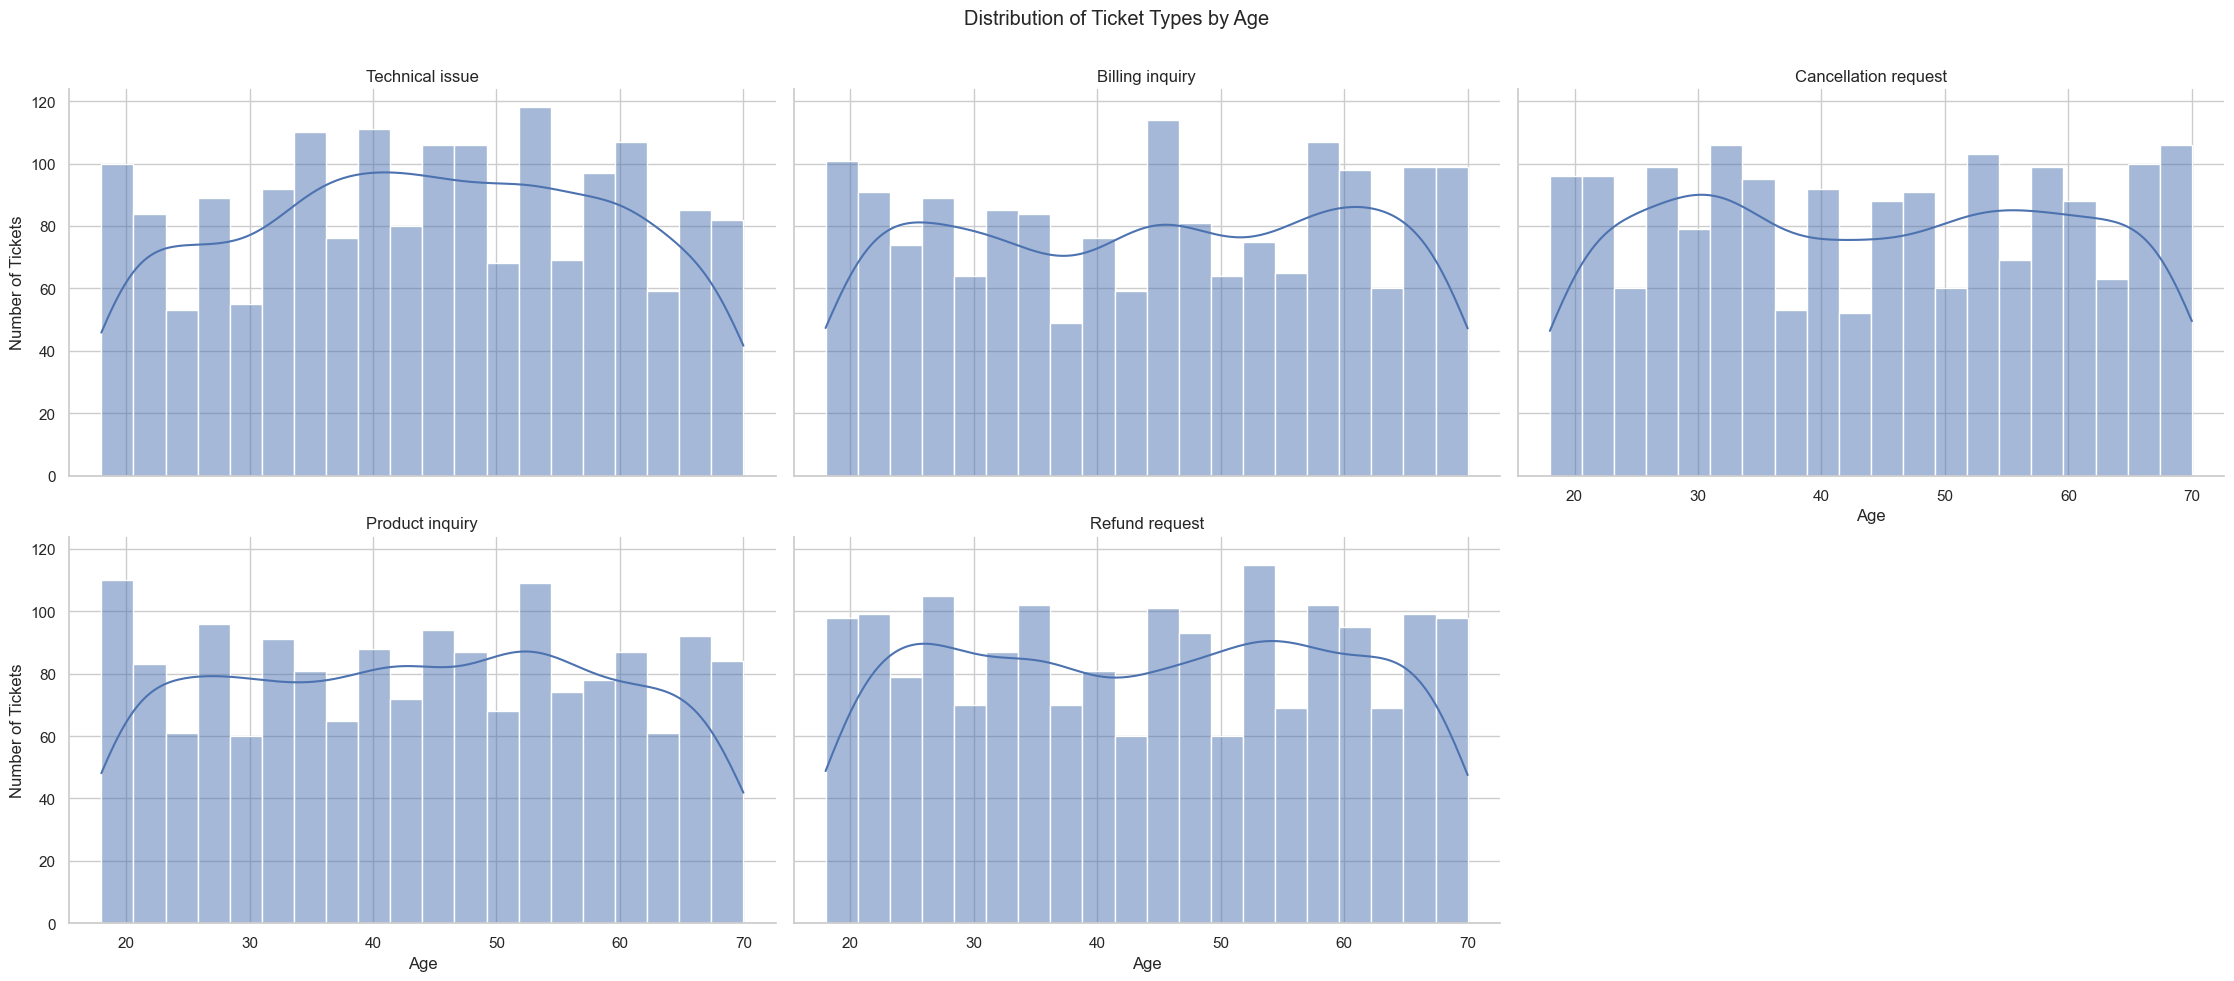

In [124]:
dataset.replace([np.inf,-np.inf], np.nan, inplace=True)
g = sns.FacetGrid(dataset, col='Ticket Type', col_wrap=3,height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')
plt.show()